# Random Forest Regression on Cars Dataset

**Import the required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 

**Read the data set**

In [2]:
carsDataSet = pd.read_csv("Cars93.csv")
carsDataSet.head(3)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


**Drop the first column as it is unwanted**

In [3]:
cars=carsDataSet.drop(labels ="Unnamed: 0" ,axis = 1)
cars.head(3)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64


**Data Pre-processing**

In [5]:
cars.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

**Exploratory Data Analysis(EDA)**

In [6]:
#seggregating categorical and continuous variables into its corresponsing lists for 
#further data visualization.

categoricalColumnsList = []
continuousColumnsList = []

def catcon(dataset):
    for colNames in dataset.columns:
        if dataset[colNames].dtypes =="object":
            categoricalColumnsList.append(colNames)
        else:
            continuousColumnsList.append(colNames)
    return categoricalColumnsList,continuousColumnsList

In [7]:
categorical,continuous = catcon(cars)

In [8]:
print("Categorical columns : %s"%categorical)
print("                                 ")
print("Continuous columns : %s"%continuous)

Categorical columns : ['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']
                                 
Continuous columns : ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']


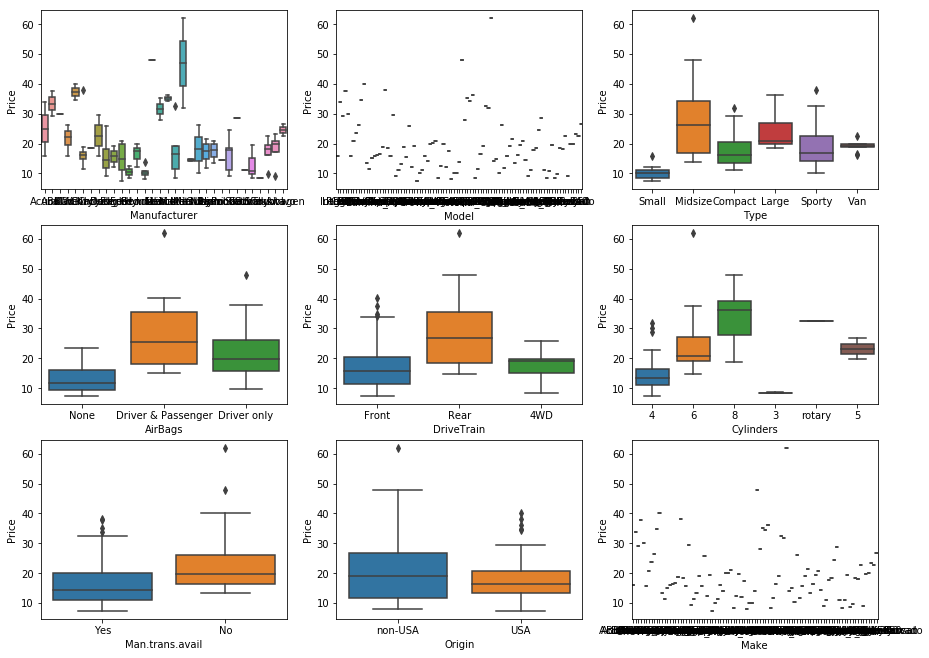

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(15,27))
j= 1
for catColumns in categorical:
    plt.subplot(7,3,j)
    sb.boxplot(cars[catColumns],cars.Price)
    plt.xlabel("%s"%catColumns)
    plt.ylabel("Price")
    j = j +1
plt.show()

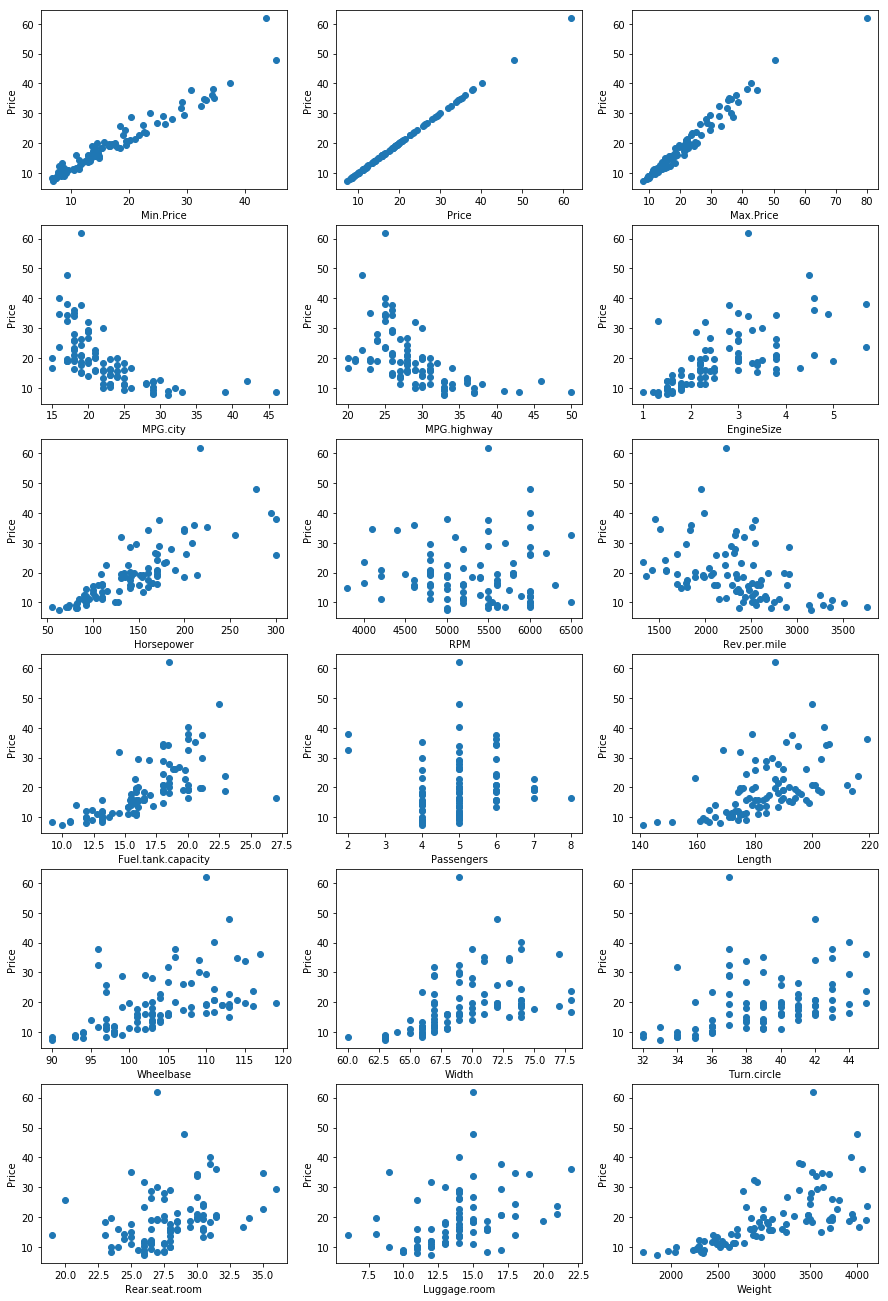

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(15,27))
j= 1
for contColumns in continuous:
    plt.subplot(7,3,j)
    plt.scatter(cars[contColumns],cars.Price)
    plt.xlabel("%s"%contColumns)
    plt.ylabel("Price")
    j = j +1
plt.show()

**Label Encoding**

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cars=cars.apply(le.fit_transform)

**Prepare the data for sampling**

In [12]:
X = cars[cars.columns[~cars.columns.isin(['Price'])]]
Y = cars[["Price"]]

**Split the data into training and testing sets**

In [13]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=40)

/home/varshita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


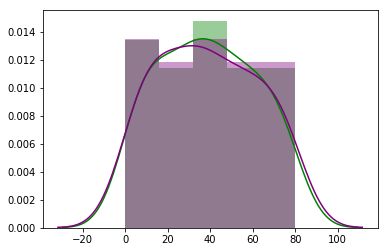

In [14]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")

**Observation : The sampling done is good.**

**Create a dictionary of parameters to be tuned **

In [15]:
tp = {"n_estimators":range(2,50)}

**Create the model using sklearn RandomForestRegressor**

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state= 30)

/home/varshita/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**Find the best value of tuning parameter to reduce the model error using cross validation**

In [17]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfr,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain.values.ravel())
rfrBestParams=cvmodel.best_params_
print("The best parameters for Random Forest Regressor are %s  "%rfrBestParams)

The best parameters for Random Forest Regressor are {'n_estimators': 43}  


In [18]:
rfr = RandomForestRegressor(random_state=30,n_estimators=43)
modelRandomForestRegressor=rfr.fit(xtrain,ytrain.values.ravel())

**Build Predictions**

In [19]:
predRandomForestRegressor=modelRandomForestRegressor.predict(xtest)

**Confusion matrix and Mean Absolute Error for Random Forest Regression**

In [20]:
from sklearn.metrics import mean_absolute_error

print("The mean absolute error for Random Forest Regression is %.2f"%mean_absolute_error(ytest,predRandomForestRegressor))

The mean absolute error for Random Forest Regression is 1.94


**Calculate the feature importance matrix **

In [21]:
modelRandomForestRegressor.feature_importances_

array([3.49393548e-04, 1.24363623e-03, 2.04775495e-04, 2.80004936e-01,
       6.95372580e-01, 3.37614458e-03, 4.23263665e-04, 1.98427883e-04,
       5.46635966e-04, 6.97322962e-05, 6.58691893e-04, 7.43276048e-03,
       6.22855528e-04, 7.41332829e-04, 1.55110350e-04, 9.94257954e-04,
       4.14625404e-04, 6.04751527e-04, 4.36303210e-04, 2.97061413e-04,
       7.40172450e-04, 9.16235522e-04, 5.75383051e-04, 2.25279248e-03,
       3.28208433e-04, 1.03993191e-03])

**Print the name and its importance of each feature in a ascending manner**

In [22]:
featureImportanceDf = pd.DataFrame(list(zip(X.columns,modelRandomForestRegressor.feature_importances_)),columns=["features","importance"])
sortedFeatureImportance = featureImportanceDf.sort_values(by=["importance"])
print(sortedFeatureImportance)

              features  importance
9            Cylinders    0.000070
14     Man.trans.avail    0.000155
7              AirBags    0.000198
2                 Type    0.000205
19               Width    0.000297
24              Origin    0.000328
0         Manufacturer    0.000349
16          Passengers    0.000415
6          MPG.highway    0.000423
18           Wheelbase    0.000436
8           DriveTrain    0.000547
22        Luggage.room    0.000575
17              Length    0.000605
12                 RPM    0.000623
10          EngineSize    0.000659
20         Turn.circle    0.000740
13        Rev.per.mile    0.000741
21      Rear.seat.room    0.000916
15  Fuel.tank.capacity    0.000994
25                Make    0.001040
1                Model    0.001244
23              Weight    0.002253
5             MPG.city    0.003376
11          Horsepower    0.007433
3            Min.Price    0.280005
4            Max.Price    0.695373
